<h1 style='color:#0000ec'>4 &nbsp; Emprego da biblioteca SciPy</h1>

&nbsp; Importando as bibliotecas <b>Numpy</b>, <b>SciPy</b> e <b>Matplotlib</b>:

In [1]:
import numpy as np
import scipy.integrate as sciInt
import matplotlib.pyplot as plt

&nbsp; Escrevendo arquivo contendo a função <i><b>modelo_malthus(	&lt;população>,	&lt;tempo>)</b></i> contendo o modelo matemático do fenômeno:

In [2]:
%%writefile ../python/modelo_malthus.py
#Definindo o modelo populacional
def modelo_malthus(t,P):
    return 0.0056*P

Overwriting ../python/modelo_malthus.py


&nbsp; Escrevendo arquivo contendo a função <i><b>modelo_verhulst(	&lt;população>,	&lt;tempo>)</b></i> contendo o modelo matemático do fenômeno:

In [3]:
%%writefile ../python/modelo_verhulst.py
#Definindo o modelo populacional
def modelo_verhulst(t,P):
    L = 300000
    k = 0.01553891418938226
    return  (k*(1-P/L))*P

Overwriting ../python/modelo_verhulst.py


&nbsp; Criando o vetor tempo de 10 à 21:

In [4]:
t = np.linspace(0,21) #vetor tempo
print(t)
P0 = 186488 # população inicial

[ 0.          0.42857143  0.85714286  1.28571429  1.71428571  2.14285714
  2.57142857  3.          3.42857143  3.85714286  4.28571429  4.71428571
  5.14285714  5.57142857  6.          6.42857143  6.85714286  7.28571429
  7.71428571  8.14285714  8.57142857  9.          9.42857143  9.85714286
 10.28571429 10.71428571 11.14285714 11.57142857 12.         12.42857143
 12.85714286 13.28571429 13.71428571 14.14285714 14.57142857 15.
 15.42857143 15.85714286 16.28571429 16.71428571 17.14285714 17.57142857
 18.         18.42857143 18.85714286 19.28571429 19.71428571 20.14285714
 20.57142857 21.        ]


&nbsp; Carregando o diretório <b>python/</b> que contém as funções escritas ao longo dos tópico e importando o <b>modelo</b>:

In [5]:
import sys
sys.path.insert(0,'../python')

from modelo_malthus import modelo_malthus
from modelo_verhulst import modelo_verhulst

<h2 style='color:#0000b7' >&nbsp; 4.1 &nbsp;Modelo de Malthus</h2>

<h3 style='color:#b50000' >&nbsp; &nbsp; 4.1.1 &nbsp;scipy.integrate.odeint - Método LSODA</h3>

In [6]:
sol = sciInt.odeint(modelo_malthus, y0=P0, t=t, tfirst=True)
print(np.transpose(sol))

[[186488.         186936.10907328 187385.29485165 187835.55982436
  188286.90687372 188739.33761878 189192.85510744 189647.46222192
  190103.16184443 190559.95685719 191017.84997429 191476.84342271
  191936.93980267 192398.14175096 192860.45190436 193323.87289963
  193788.4074303  194254.05821347 194720.82792168 195188.71922743
  195657.73480325 196127.87754588 196599.149657   197071.55426971
  197545.09406836 198019.7717438  198495.5899933  198972.55154275
  199450.65918686 199929.91567504 200410.32376022 200891.886204
  201374.60577664 201858.48525707 202343.5274329  202829.73510041
  203317.11106453 203805.65813888 204295.37914357 204786.27687751
  205278.35416095 205771.6138302  206266.05872933 206761.69171016
  207258.51563229 207756.53336304 208255.74777753 208756.16175862
  209257.77819692 209760.59999083]]


&nbsp; &nbsp; &nbsp; &nbsp; Exibindo gráfico <b>vt</b> $\times$ <b>$P$</b>

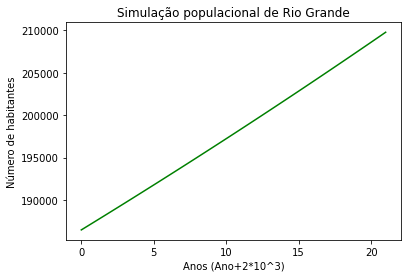

Simulação para 2021: [209760.59999083]


In [7]:
plt.plot(t,sol,"g")

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos (Ano+2*10^3)")
plt.ylabel("Número de habitantes")
plt.show()

print("Simulação para 2021:",sol[sol.shape[0]-1])

<h3 style='color:#b50000' >&nbsp; &nbsp; 4.1.2 &nbsp;scipy.solve_ivp - Método RK45 (Padrão)</h3>

In [8]:
sol = sciInt.solve_ivp(modelo_malthus, t_span=(0,max(t)), y0=[P0], t_eval=t)
sol.y[0]

array([186488.        , 186936.10871537, 187385.29418327, 187835.55899097,
       188286.90573199, 188739.33700609, 189192.85541929, 189647.46358387,
       190103.16412326, 190559.95967192, 191017.85285807, 191476.84631608,
       191936.94268699, 192398.14461853, 192860.4547651 , 193323.87578777,
       193788.4103543 , 194254.06113911, 194720.83082332, 195188.72209469,
       195657.7376477 , 196127.88018346, 196599.15240981, 197071.55704121,
       197545.09679884, 198019.77441054, 198495.59261082, 198972.55414087,
       199450.66174857, 199929.91818846, 200410.32622176, 200891.88861637,
       201374.60814686, 201858.4875945 , 202343.52974719, 202829.73739956,
       203317.11335287, 203805.66041509, 204295.38140085, 204786.27913146,
       205278.3564349 , 205771.61614584, 206266.06110562, 206761.69416225,
       207258.51817043, 207756.53599151, 208255.75049355, 208756.16455127,
       209257.78104607, 209760.60286601])

&nbsp; &nbsp; &nbsp; &nbsp; Exibindo gráfico <b>vt</b> $\times$ <b>$P$</b>:

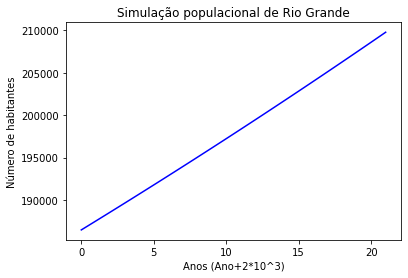

Simulação para 2021: 209760.60286601182


In [9]:
plt.plot(t,sol.y[0],"b")

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos (Ano+2*10^3)")
plt.ylabel("Número de habitantes")
plt.show()

print("Simulação para 2021:",sol.y[0][sol.y[0].shape[0]-1])

<h2 style='color:#0000b7' >&nbsp; 4.2 &nbsp;Modelo de Verhulst</h2>

<h3 style='color:#b50000' >&nbsp; &nbsp; 4.2.1 &nbsp;scipy.integrate.odeint - Método LSODA</h3>

&nbsp; &nbsp; &nbsp; &nbsp; Obtendo aproximação:

In [10]:
sol = sciInt.odeint(modelo_verhulst, y0=P0, t=t, tfirst=True)
print(np.transpose(sol))

[[186488.         186957.52767275 187426.28563095 187894.26543432
  188361.45961484 188827.86037933 189293.45786442 189758.2424712
  190222.20698082 190685.34377043 191147.64469267 191609.10181203
  192069.70735085 192529.45338078 192988.33220964 193446.33589253
  193903.45712762 194359.68814558 194815.02153006 195269.44988126
  195722.96581229 196175.56202651 196627.23131756 197077.96656936
  197527.76072958 197976.60672744 198424.49763828 198871.42662861
  199317.38694631 199762.37192059 200206.37496204 200649.38949677
  201091.40896512 201532.42694625 201972.43709189 202411.43312589
  202849.40884419 203286.3581154  203722.2748979  204157.15322102
  204590.9871817  205023.7709505  205455.49877157 205886.16496265
  206315.7639174  206744.29011574 207171.73810549 207598.10250754
  208023.3780174  208447.55940518]]


&nbsp; &nbsp; Gerando solução com vetor variando de 0 à 500, com o obejtivo de visualizarmos a assíntota horizontal em <b>P</b> = <b>L</b>

In [11]:
t_lim = np.linspace(0,500)
sol_lim = sciInt.odeint(modelo_verhulst, y0=P0, t=t_lim, tfirst=True)

&nbsp; &nbsp; &nbsp; &nbsp; Exibindo gráfico <b>vt</b> $\times$ <b>$P$</b>

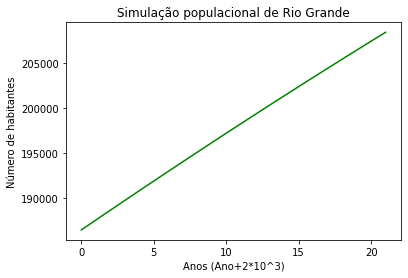

Simulação para 2021: [208447.55940518]


In [12]:
plt.plot(t,sol,"g")

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos (Ano+2*10^3)")
plt.ylabel("Número de habitantes")
plt.show()

print("Simulação para 2021:",sol[sol.shape[0]-1])

&nbsp; &nbsp; &nbsp; &nbsp; Exibindo gráfico <b>vt</b> $\times$ <b>$P$</b> com característica assintótica:

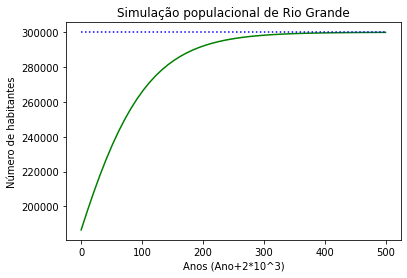

In [13]:
L = 300000 #Limite (L)

plt.plot(t_lim,sol_lim,"g") #Curva logística
plt.plot(t_lim,np.full(t_lim.shape[0], L),"b", linestyle = 'dotted') #Assíntota

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos (Ano+2*10^3)")
plt.ylabel("Número de habitantes")
plt.show()

<h3 style='color:#b50000' >&nbsp; &nbsp; 4.2.2 &nbsp;scipy.solve_ivp - Método RK45 (Padrão)</h3>

In [14]:
sol = sciInt.solve_ivp(modelo_verhulst, t_span=(0,max(t)), y0=[P0], t_eval=t)
print(sol.y[0])

sol_lim = sciInt.solve_ivp(modelo_verhulst, t_span=(0,max(t_lim)), y0=[P0], t_eval=t_lim)

[186488.         186957.52861553 187426.28746336 187894.26806541
 188361.46200676 188827.86093608 189293.45656561 189758.24067117
 190222.20515165 190685.34199472 191147.64312896 191609.10055252
 192069.70633586 192529.45262175 192988.33162528 193446.33563381
 193903.45700705 194359.68817697 194815.02164788 195269.44999638
 195722.96587139 196175.56199412 196627.2311581  197077.96622916
 197527.76014542 197976.60591734 198424.49662766 198871.42543143
 199317.38555602 199762.37030109 200206.37303861 200649.38721286
 201091.40634043 201532.4240102  201972.43388338 202411.42969345
 202849.40524624 203286.35441986 203722.27116473 204157.14950357
 204590.98353141 205023.7674156  205455.49539579 205886.16178391
 206315.76096424 206744.28739333 207171.73560005 207598.10018557
 208023.37582339 208447.55725928]


&nbsp; &nbsp; &nbsp; &nbsp; Exibindo gráfico <b>vt</b> $\times$ <b>$P$</b>

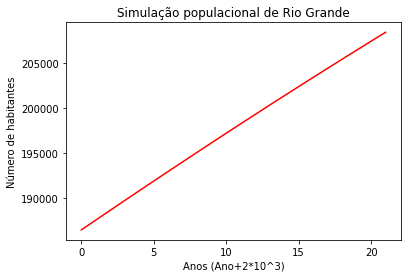

Simulação para 2021: 208447.55725927802


In [15]:
plt.plot(t,sol.y[0],"r")

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos (Ano+2*10^3)")
plt.ylabel("Número de habitantes")
plt.show()

print("Simulação para 2021:",sol.y[0][sol.y[0].shape[0]-1])

&nbsp; &nbsp; &nbsp; &nbsp; Exibindo gráfico <b>vt</b> $\times$ <b>$P$</b> com característica assintótica:

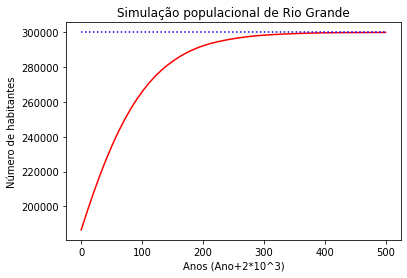

In [16]:
plt.plot(t_lim,sol_lim.y[0],"r") #Curva logística
plt.plot(t_lim,np.full(t_lim.shape[0], L),"b", linestyle = 'dotted') #Assíntota

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos (Ano+2*10^3)")
plt.ylabel("Número de habitantes")
plt.show()